This data set contains booking information for a city hotel and a resort hotel located in the city of Lisbon and the resort region of Algarve, respectively. It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. We will be using the dataset to predict what bookings are likely to be cancelled by the guest(s) prior to their arrival.

See https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data for a detailed data card.

In [715]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.impute import *
from sklearn.model_selection import *

data = pd.read_csv("data/booking_data_raw.csv")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Observing the Data**
--

In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [717]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Country, reservation status date, agent, company with high cardinality

In [718]:
catCols = data.select_dtypes("object")
catCols['agent'] = data['agent']
catCols['company'] = data['company']
catCols['is_canceled'] = data['is_canceled']
catCols['is_repeated_guest'] = data['is_repeated_guest']
catCols.nunique()

hotel                        2
arrival_date_month          12
meal                         5
country                    177
market_segment               8
distribution_channel         5
reserved_room_type          10
assigned_room_type          12
deposit_type                 3
customer_type                4
reservation_status           3
reservation_status_date    926
agent                      333
company                    352
is_canceled                  2
is_repeated_guest            2
dtype: int64

In [719]:
print(data.isna().sum().sort_values())

hotel                                  0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
is_repeated_guest                      0
reservation_status                     0
distribution_channel                   0
reservation_status_date                0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
market_segment                         0
is_canceled                            0
arrival_date_wee

In [720]:
print(data['reservation_status'].unique())

['Check-Out' 'Canceled' 'No-Show']


In [721]:
print(data['country'].value_counts())

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64


**Notes**
---

- Value in company column indicates booking was made by company, same applies for agent column; both can be null if booking made individually
- Company column is mostly null, essentially useless for our purposes since it has no integrity; will drop
- Can create new 'booked_by_company' and 'booked_by_agent' columns to preserve info from dropped company feature, and dropped null values of agent
- target encode country, agent; features have high cardinality, one-hot encoding would introduce bias (post train-test split)
- data leakage in reservation_status; shows if booking has been canceled, can be dropped alongside reservation_status_date

**Preprocessing**
--

booked_by_agent and booked_by_company columns

In [722]:
data['booked_by_agent'] = data['agent'].notnull().astype(int)
data['booked_by_company'] = data['company'].notnull().astype(int)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booked_by_agent,booked_by_company
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,1,0


Company feature itself has no integrity; drop

In [723]:
data = data.drop(columns="company")

reservation status details redundant

In [724]:
data = data.drop(columns=["reservation_status", "reservation_status_date"])
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,booked_by_agent,booked_by_company
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,1,0


NaN values under children, country, columns represent small fraction of total rows, can simply dropna

In [725]:
data = data.dropna(subset=['children'])
data = data.dropna(subset=['country'])
data = data.dropna(subset=['agent'])
print(data.shape)

(102894, 31)


dropping rows with no guests recorded

In [726]:
data = data[(data['adults'] != 0) | (data['children'] != 0) | (data['babies'] != 0)]
data.shape

(102774, 31)

dropping rows with no adults

In [727]:
data = data[data['adults'] != 0]
data.shape

(102568, 31)

quantifying arrival_date_month

In [728]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

data['arrival_date_month'] = data['arrival_date_month'].map(month_mapping)

renaming 0/1 in 'is_repeated_guest' to No/Yes for name clarity after encoding

In [729]:
data = data.rename(columns={'is_repeated_guest':'repeated_guest'})

data['repeated_guest'] = data['repeated_guest'].map({0: 'No', 1: 'Yes'})


one-hot encoding low-cardinality columns

In [730]:
cols = ['hotel','meal', 'market_segment', 'distribution_channel', 'repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

data = pd.get_dummies(data, columns=cols)
data.head()

# agent, country to be encoded after split

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
3,0,13,2015,7,27,1,0,1,1,0.0,...,False,False,False,True,False,False,False,False,True,False
4,0,14,2015,7,27,1,0,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False
5,0,14,2015,7,27,1,0,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False
7,0,9,2015,7,27,1,0,2,2,0.0,...,False,False,False,True,False,False,False,False,True,False
8,1,85,2015,7,27,1,0,3,2,0.0,...,False,False,False,True,False,False,False,False,True,False


train-test split

In [731]:
X = data.drop(columns='is_canceled')
Y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=30)


target encoding agent, country columns in train/test sets separately; avoid data leakage

In [732]:
# from sklearn.preprocessing import TargetEncoder
# encoder = TargetEncoder()

# X_train['agent_encoded'] = encoder.fit_transform(X_train['agent'].values.reshape(-1,1), y_train)
# X_train['country'] = encoder.fit_transform(X_train['country'].values.reshape(-1,1), y_train)

# agent_means = X_train.groupby('agent')['agent_encoded'].mean().to_dict()

# X_test['agent'] = X_test['agent'].map(agent_means)
# X_test['country'] = encoder.transform(X_test['country'].values.reshape(-1,1))

# X_train['agent'] = X_train['agent_encoded']
# X_train.drop(columns=['agent_encoded'])

from sklearn.preprocessing import TargetEncoder
encoder = TargetEncoder()

copy = X_train[['agent','country']].copy()

copy['agent_encoded'] = encoder.fit_transform(copy['agent'].values.reshape(-1,1), y_train)

agent_means = copy.groupby('agent')['agent_encoded'].mean().to_dict()

X_train['agent'] = encoder.fit_transform(X_train['agent'].values.reshape(-1,1), y_train)
X_train['country'] = encoder.fit_transform(X_train['country'].values.reshape(-1,1), y_train)

X_test['agent'] = X_test['agent'].map(agent_means)
X_test['country'] = encoder.transform(X_test['country'].values.reshape(-1,1))

X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
36638,3,2017,5,21,21,2,2,2,0.0,0,...,False,False,False,True,False,False,False,False,True,False
52082,38,2016,5,23,30,1,1,2,1.0,0,...,False,False,False,True,False,False,False,False,True,False
72751,138,2017,8,31,5,1,1,1,0.0,0,...,False,False,False,True,False,False,False,False,True,False
15633,142,2015,7,29,16,4,10,2,0.0,0,...,False,False,False,True,False,False,True,False,False,False
111304,90,2017,5,18,6,2,1,2,0.0,0,...,False,False,False,True,False,False,False,False,True,False


**EDA**
--

**Mutual Info Classification**

In [733]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)

mi_scores = pd.DataFrame({'Feature': X_train.columns, 'Mutual Info Score': mi_scores})

mi_scores = mi_scores.sort_values(by='Mutual Info Score', ascending=False)

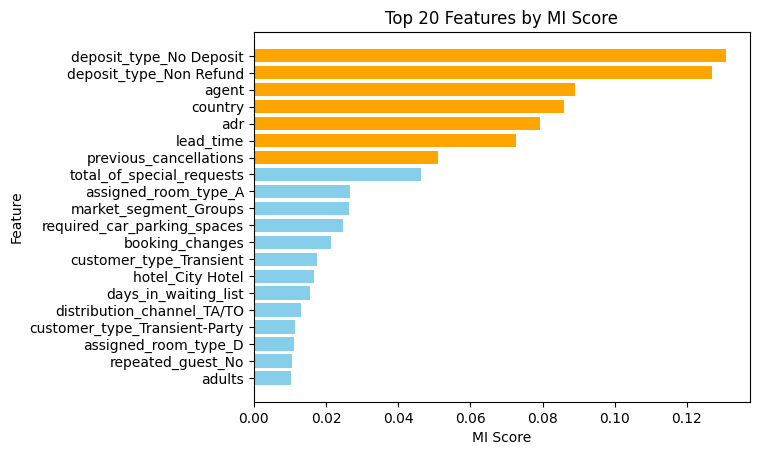

In [734]:
top_n = 20

top_features=mi_scores.head(top_n)

bar_colors = ['orange' if i < (top_n/3) else 'skyblue' for i in range(top_n)]

plt.barh(top_features['Feature'], top_features['Mutual Info Score'], color=bar_colors)
plt.xlabel('MI Score')
plt.ylabel('Feature')
plt.title('Top {} Features by MI Score'.format(top_n))
plt.gca().invert_yaxis()
plt.show()

Deposit type, agent, country, booking price, lead time, and number of previous cancellations seem to have the strongest effect on cancellations

We will explore further

**Deposit Type**

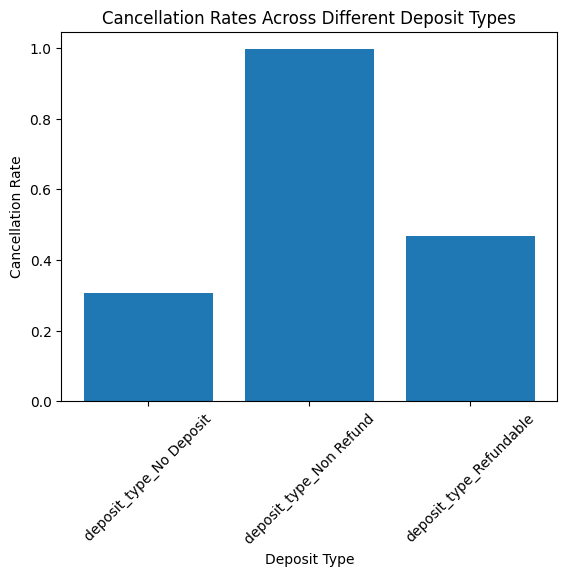

In [735]:
deposit_type_cancel_totals = {'deposit_type_No Deposit': 0, 'deposit_type_Non Refund': 0, 'deposit_type_Refundable': 0}

for id, row in X_train.iterrows():
    deposit_types = row[59:62]
    for deposit_type, value in deposit_type_cancel_totals.items():
        if deposit_types[deposit_type] == 1:
            deposit_type_cancel_totals[deposit_type] += y_train[id]
            break

cancellation_rates = {}
for deposit_type, total in deposit_type_cancel_totals.items():
    total_occurrences = (X_train[deposit_type]==1).sum()
    cancellation_rate = total / total_occurrences if total_occurrences > 0 else 0.0
    cancellation_rates[deposit_type] = cancellation_rate

plt.bar(cancellation_rates.keys(), cancellation_rates.values())
plt.xlabel('Deposit Type')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates Across Different Deposit Types')
plt.show()

In [736]:
for deposit_type, total in deposit_type_cancel_totals.items():
    total_occurrences = (X_train[deposit_type]==1).sum()
    print(total_occurrences)

63004
8763
30


Very few hotel bookings were made with a refundable deposit; the associated observation for cancellation rate may not hold much merit. On the other hand, we can see a significant number of observations for the No Deposit and Non-Refundable deposit types. The non-refundable deposit type exhibits a connection to an extremely high cancellation rate, at almost 100%. The lack of flexibility with non-refundable bookings may means that customers cannot easily adapt to any unforeseen changes in their plans, leading to the high degree of cancellations for this specific deposit type.


Country also ranks high for it's MI score. This dataset is compiled from bookings at Portuguese hotels, so it is a fair guess to say that Portugal will rank high for total occurences under the country feature, since portuguese residents will find it the easiest to travel/sightsee/explore within their own country. Portugal may also have one of the higher cancellation rates among other countries given that portuguese residents booking hotels in their own country make far less of a commitment than tourists visiting from abroad (consider flights, alternative accomodation, time off work).

Let us explore further using copy, a version of X_train saved in order to preserve the original column values of agent and country before target encoding.

**Country**

In [737]:
copy.head()

,agent,country,agent_encoded
36638,240.0,POL,0.392452
52082,9.0,BRA,0.417184
72751,9.0,USA,0.415006
15633,243.0,GBR,0.056203
111304,9.0,FRA,0.415006


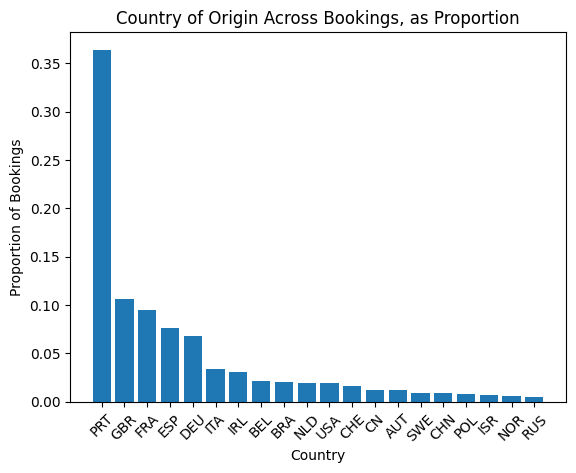

In [738]:
counts = copy['country'].value_counts()[:20]
keys = copy['country'].value_counts()[:20].index

plt.bar(keys, counts/len(copy))
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Bookings')
plt.title('Country of Origin Across Bookings, as Proportion')
plt.show()

*Countries in ISO 3155–3:2013 format*

As expected, bookings by Portuguese residents represent a high proportion of the total bookings made. Let's see if this has any impact on cancellation rates as well.

26137


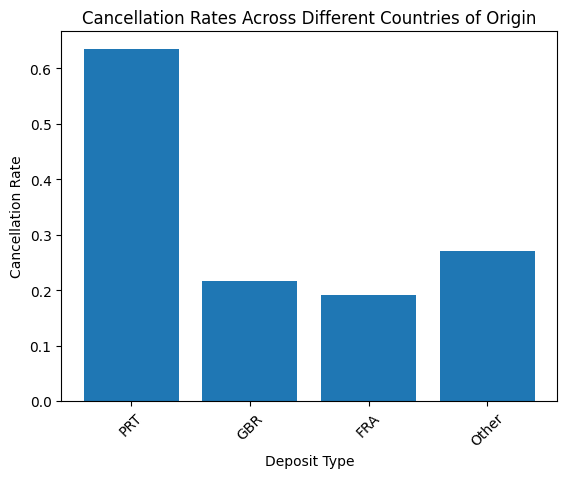

In [739]:
country_totals = {'PRT': 0, 'GBR': 0, 'FRA': 0, 'Other': 0}

for id, row in copy.iterrows():
    country = row['country']
    if country in country_totals.keys():
        country_totals[country] += y_train[id]
    else:
        country_totals['Other'] += y_train[id]


print((copy['country'] ==  'PRT').sum())

total_occurrences = {}
total_occurrences['PRT'] = (copy['country'] ==  'PRT').sum()
total_occurrences['GBR'] = (copy['country'] ==  'GBR').sum()
total_occurrences['FRA'] = (copy['country'] ==  'FRA').sum()
total_occurrences['Other'] = ((copy['country'] != 'PRT') & (copy['country'] != 'GBR') & (copy['country'] != 'FRA')).sum()

cancellation_rates = {}
cancellation_rates['PRT'] = country_totals['PRT'] / total_occurrences['PRT']
cancellation_rates['GBR'] = country_totals['GBR'] / total_occurrences['GBR']
cancellation_rates['FRA'] = country_totals['FRA'] / total_occurrences['FRA']
cancellation_rates['Other'] = country_totals['Other'] / total_occurrences['Other']

plt.bar(cancellation_rates.keys(), cancellation_rates.values())
plt.xlabel('Deposit Type')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates Across Different Countries of Origin')
plt.show()

As predicted, bookings made from Portuguese residents experience a significantly higher cancellation rate. As described earlier, this group benefits from the additional freedoms of travelling and/or vacationing within their own country, as opposed to those coming from abroad. This would explain the lower variance in cancellation rates between the second and third most popular country of origin, and other countries in the dataset.

Let us take a look at avg. daily rate (adr) next.

**ADR**

In [740]:
X_train[X_train['adr'] > 400]['adr'].head(20)

39568      402.00
39155      426.25
111403     510.00
48515     5400.00
Name: adr, dtype: float64

In [741]:
X_train[X_train['adr'] == 0]['adr'].head(1000)

46936    0.0
19579    0.0
18372    0.0
29703    0.0
28419    0.0
        ... 
99353    0.0
619      0.0
3259     0.0
89108    0.0
21359    0.0
Name: adr, Length: 649, dtype: float64

In [742]:
X_train[X_train['adr'] < 0]['adr'].head(20)

14969   -6.38
Name: adr, dtype: float64

On the upper end of adr, there is only one extreme value: 5400. This may represent a booking at a high-end, luxury resort clearly affordable to only very few people. There are over 700 bookings made at an adr of 0, and even one at a negative rate. Let us cross check these bookings with the corresponding 'is_canceled' value to see if an adr of 0 ALWAYS represents a cancelled booking.

In [743]:
cancelCount = {'Canceled': 0, 'Not Canceled': 0}

for id, row in X_train[X_train['adr'] == 0].iterrows():
    if row['adr'] == y_train[id]:
        cancelCount['Not Canceled'] += 1 #0 == 0, meaning is_canceled recorded as 0 too
    else:
        cancelCount['Canceled'] += 1 #0 != 1, meaning is_canceled recorded as 0 too

cancelCount

{'Canceled': 61, 'Not Canceled': 588}

The majority of the 0 adr bookings are not canceled, so they could instead represent (1) free/complimentary stays, (2) loyalty program points redemption, (3) group bookings; large groups may negotiate special/lowered rates from some rooms, resulting in adr = 0.

The lone booking with a negative adr could be a result of adjustments and/or refunds that exceed the revenue from the room.

Having addressed the unusual values, we can now explore the effect of adr on cancellation rates.

In [744]:
X_train['adr'].describe()

count    71797.000000
mean       104.765416
std         51.095839
min         -6.380000
25%         73.000000
50%         96.300000
75%        128.000000
max       5400.000000
Name: adr, dtype: float64

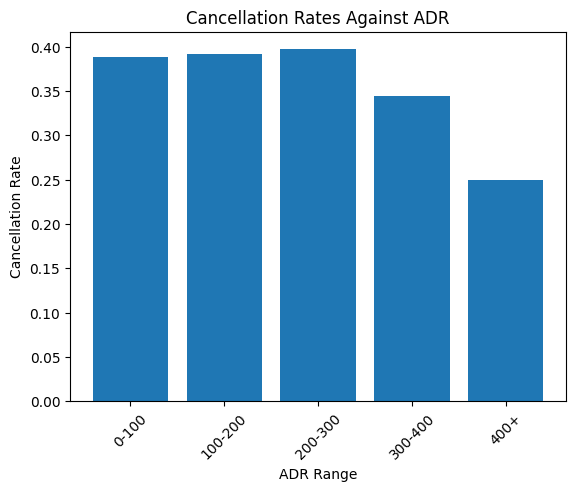

In [745]:
adr_totals = {'0-100': 0, '100-200': 0, '200-300': 0, '300-400': 0, '400+': 0}

for id, row in X_train.iterrows():
    adr = row['adr']
    if 0 <= adr <= 100:
        adr_totals['0-100'] += y_train[id]
    elif 100 < adr <= 200:
        adr_totals['100-200'] += y_train[id]
    elif 200 < adr <= 300:
        adr_totals['200-300'] += y_train[id]
    elif 300 < adr <= 400:
        adr_totals['300-400'] += y_train[id]
    elif 400 < adr:
        adr_totals['400+'] += y_train[id]

total_occurrences = {}
total_occurrences['0-100'] = ((X_train['adr'] >= 0) & (X_train['adr'] <= 100)).sum()
total_occurrences['100-200'] = ((X_train['adr'] > 100) & (X_train['adr'] <= 200)).sum()
total_occurrences['200-300'] = ((X_train['adr'] > 200) & (X_train['adr'] <= 300)).sum()
total_occurrences['300-400'] = ((X_train['adr'] > 300) & (X_train['adr'] <= 400)).sum()
total_occurrences['400+'] = (X_train['adr'] > 400).sum()

cancellation_rates = {}
cancellation_rates['0-100'] = adr_totals['0-100'] / total_occurrences['0-100']
cancellation_rates['100-200'] = adr_totals['100-200'] / total_occurrences['100-200']
cancellation_rates['200-300'] = adr_totals['200-300'] / total_occurrences['200-300']
cancellation_rates['300-400'] = adr_totals['300-400'] / total_occurrences['300-400']
cancellation_rates['400+'] = adr_totals['400+'] / total_occurrences['400+']

plt.bar(cancellation_rates.keys(), cancellation_rates.values())
plt.xlabel('ADR Range')
plt.xticks(rotation=45)
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rates Against ADR')
plt.show()

In [746]:
X_train[X_train['adr'] > 400]['adr'].head(20)

39568      402.00
39155      426.25
111403     510.00
48515     5400.00
Name: adr, dtype: float64

The visible trend is the fall in cancellation rates as we approach a higher adr for the bookings. This may represent a greater "commitment" to the stay when a greater financial commitment is made. Cross-checking this against the prevalence of non-refundable and refundable deposits within these ADR ranges would provide more visibility.

**Model**
---

**Standardizing data**

Fitting the scaler to the X_train subset, and applying the same scaling factors to X_test

In [747]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in X_train.columns:
    X_train[col] = X_train[col].astype(float)
    X_test[col] = X_test[col].astype(float)

cols = X_train.columns

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train.columns = cols
X_test.columns = cols

X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,-1.008857,1.193079,-0.526203,-0.475796,0.590686,1.017575,-0.310759,0.196892,-0.267572,-0.075392,...,-0.078075,-0.05338,-0.039703,0.373581,-0.372854,-0.020446,-0.201748,-0.067433,0.566064,-0.498489
1,-0.684728,-0.223553,-0.526203,-0.325298,1.614611,0.019272,-0.835909,0.196892,2.215737,-0.075392,...,-0.078075,-0.05338,-0.039703,0.373581,-0.372854,-0.020446,-0.201748,-0.067433,0.566064,-0.498489
2,0.241355,1.193079,0.466800,0.276696,-1.229625,0.019272,-0.835909,-1.901721,-0.267572,-0.075392,...,-0.078075,-0.05338,-0.039703,0.373581,-0.372854,-0.020446,-0.201748,-0.067433,0.566064,-0.498489
3,0.278399,-1.640185,0.135799,0.126198,0.021839,3.014182,3.890444,0.196892,-0.267572,-0.075392,...,-0.078075,-0.05338,-0.039703,0.373581,-0.372854,-0.020446,4.956686,-0.067433,-1.766584,-0.498489
4,-0.203164,1.193079,-0.526203,-0.701544,-1.115855,1.017575,-0.835909,0.196892,-0.267572,-0.075392,...,-0.078075,-0.05338,-0.039703,0.373581,-0.372854,-0.020446,-0.201748,-0.067433,0.566064,-0.498489


Instantiating XGBoost model

In [748]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', verbosity=0, use_label_encoder=False)

Performing nested cross-validation 

In [749]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# inner CV for each square of the grid search, to calculate a mean score for each and every hyperparameter combination,
# on validation sets constructed from each of the folds of the outer CV
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# once best params found by grid search, outer CV finds a mean score of the model's performance using the best params on separate validation sets
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)

# Apply the aggressive warning filter
search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=inner_cv, n_jobs=-1)
nested_score = cross_val_score(search, X_train, y_train, cv=outer_cv, n_jobs=-1)

# Fit the grid search to the data
search.fit(X_train, y_train)

# Obtain the best hyperparameters
best_params = search.best_params_

# Compute the mean and standard deviation of the nested cross-validation scores
print(f"Best Hyperparameters: {best_params}")
print(f"Mean Accuracy: {nested_score.mean()}")
print(f"Standard Deviation: {nested_score.std()}")


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Mean Accuracy: 0.8709834761493167
Standard Deviation: 0.0018966154098718966


As we can see, the nested CV process provides a much more precise estimate of the model's accuracy when it will eventually be generalized to unseen data. Through tuning the model, we have also recorded the best hyperparameters to use for our model when fitting to our test set.

In [750]:
final_xgb_model = xgb.XGBClassifier(
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    objective='binary:logistic',
    verbosity=0  # suppress XGBoost warnings
)

final_xgb_model.fit(X_train, y_train)

y_pred = final_xgb_model.predict(X_test)

Metrics

In [751]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}".format(accuracy))

# Precision
precision = precision_score(y_test, y_pred)
print("Precision: {:.3f}".format(precision))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.3f}".format(recall))

# F1 Score; harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)
print("F1 Score: {:.3f}".format(f1))

# Confusion Matrix
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
print("Confusion Matrix:")
print(confusion)

# ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: {:.3f}".format(roc_auc))


Accuracy: 0.870
Precision: 0.844
Recall: 0.820
F1 Score: 0.832
Confusion Matrix:
[[16857  1826]
 [ 2174  9914]]
ROC AUC: 0.861


In regards to hotel bookings, a true positive represents a correct prediction of the positive class (booking cancelled: 1). As precision compares true positives against all positives, it is a measure of *quality*. Recall, on the other hand, gives a measure of *quantity*, as it compares true positives against TP + FN; in other words, the complement of the type II error rate. The choice to use either depends on if we need to minimize either false positives or false negatives for this situation.

A false positive represents a booking incorrectly classified as cancelled, and a false negative represents a booking incorrectly classified as not cancelled. The more relevant error is the type II error (FN), as reducing the number of missed cancellations ensures that the hotels can optimize their operations and avoid having empty rooms. There is also substance in minimizing the type I errors (FP), as it reduces the risk of overbooking and disruption to guests/guest services. A balance can be found in the F1 score.